## Import

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) 

## Data Load

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_df = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [ ]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## Data Pre-processing

In [ ]:
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [ ]:
# qualitative to quantitative
# one-hot encoding

qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
#전부 결측치인 column 먼저 0으로 채우기

import math

for column in train_x:
  if math.isnan(train_x[column].mean()):
    train_x[column] = 0

for column in test_x:
  if math.isnan(test_x[column].mean()):
    test_x[column] = 0

#### 결측치 채우는 방법 3가지

In [ ]:
#결측치 평균

import pandas as pd
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="mean")
#imputer 생성
train_x = pd.DataFrame(my_imputer.fit_transform(train_x), columns = train_x.columns)
test_x = pd.DataFrame(my_imputer.fit_transform(test_x), columns = test_x.columns)

In [ ]:
#결측치 중간값

import pandas as pd
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="median")
#imputer 생성
train_x = pd.DataFrame(my_imputer.fit_transform(train_x))
test_x = pd.DataFrame(my_imputer.fit_transform(test_x))

In [ ]:
#결측치 최빈값

import pandas as pd
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="most_frequent")
#imputer 생성
train_x = pd.DataFrame(my_imputer.fit_transform(train_x))
test_x = pd.DataFrame(my_imputer.fit_transform(test_x))

In [ ]:
train_x

,0,1,2,3,4,5,6,7,8,9,...,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876
0,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.3400,40.8900,32.5600,34.0900,77.7700,1.0,0.0,0.0,0.0,0.0
1,3.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,38.8900,42.8200,43.9200,35.3400,72.5500,1.0,0.0,0.0,0.0,0.0
2,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.1900,36.6500,42.4700,36.5300,78.3500,1.0,0.0,0.0,0.0,0.0
3,3.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,37.7400,39.1700,52.1700,30.5800,71.7800,1.0,0.0,0.0,0.0,0.0
4,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,38.7000,41.8900,46.9300,33.0900,76.9700,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5.0,2.0,2.000000,95.000000,0.0,45.0,10.00000,0.0,50.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
594,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,49.4700,53.0700,50.8900,55.1000,66.4900,1.0,0.0,0.0,0.0,0.0
595,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
596,4.0,1.0,40.000000,94.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_x.columns

RangeIndex(start=0, stop=2877, step=1)

In [ ]:
train_x['PRODUCT_CODE'] == 0

0       True
1       True
2       True
3       True
4       True
       ...  
593    False
594     True
595     True
596    False
597    False
Name: PRODUCT_CODE, Length: 598, dtype: bool

#### 이상치 제거를 위해 나누기

In [ ]:
#train_a = train_x[train_x['PRODUCT_CODE'] == 0]
#train_o = train_x[train_x['PRODUCT_CODE'] == 1]
#train_t = train_x[train_x['PRODUCT_CODE'] == 2]

In [ ]:
#train_a = train_x[(train_x['PRODUCT_CODE'] == 0) & (train_x['LINE'] == 0.0)]
#train_a = train_x[(train_x['LINE'] == 0.0)]

In [ ]:
line = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
prod_code = [0, 1, 2]

In [ ]:
type(df_temp['X_1'])

pandas.core.series.Series

In [ ]:
np.percentile(train_x['X_1'],75)

2.4097421203438394

In [ ]:
train_new_x = pd.DataFrame()

for i in line:
  for k in prod_code:
    print(k, i)
    df_temp = train_x[(train_x['PRODUCT_CODE'] == k) & (train_x['LINE'] == i)]
    
    if len(df_temp) != 0:
      for column in df_temp:
        iqr_value = np.percentile(df_temp[column],75) - np.percentile(df_temp[column],25) 
        upper_bound = iqr_value * 1.5 + np.percentile(df_temp[column],75)
        lower_bound = np.percentile(df_temp[column],25) - iqr_value * 1.5   
        df_temp = df_temp[(df_temp[column] <= upper_bound) & (df_temp[column] >= lower_bound)]
    
    train_new_x = train_new_x.append(df_temp)
      


0 0.0
1 0.0
2 0.0
0 1.0
1 1.0
2 1.0
0 2.0
1 2.0
2 2.0
0 3.0
1 3.0
2 3.0
0 4.0
1 4.0
2 4.0
0 5.0
1 5.0
2 5.0


In [ ]:
train_new_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 220 to 492
Columns: 2877 entries, LINE to X_2875
dtypes: float64(2877)
memory usage: 517.1 KB


In [ ]:
train_new_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
220,0.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
480,0.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
530,0.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
146,1.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
424,1.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
79,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,53.4900,55.5900,60.0000,58.1800,66.7900,1.0,0.0,0.0,0.0,0.0
199,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,54.7600,54.9300,59.6800,56.7800,64.6800,1.0,0.0,0.0,0.0,0.0
322,2.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,55.9900,52.0800,40.9000,55.3100,62.8000,1.0,0.0,0.0,0.0,0.0
7,3.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.0000,35.9500,59.5100,30.4900,72.7700,1.0,0.0,0.0,0.0,0.0
19,3.0,0.0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


In [ ]:
new_index = list(train_new_x.index)

In [ ]:
new_index

[220,
 480,
 530,
 146,
 424,
 79,
 199,
 322,
 7,
 19,
 24,
 569,
 571,
 596,
 350,
 409,
 438,
 570,
 572,
 597,
 376,
 413,
 492]

In [ ]:
train_y

0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

In [ ]:
train_y = pd.DataFrame(train_y, columns=['Y_Class'])

In [ ]:
train_y.loc[[1,2]]

,Y_Class
1,2
2,1


In [ ]:
train_new_y = pd.DataFrame() 

train_new_y = train_new_y.append(train_y.loc[new_index])

In [ ]:
train_new_y

,Y_Class
220,1
480,1
530,1
146,1
424,1
79,2
199,1
322,0
7,2
19,2


## Classification Model Fit

In [ ]:
RF = RandomForestClassifier(random_state=37).fit(train_new_x, train_new_y)
print('Done.')

<ipython-input-147-38bb076aebd0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestClassifier(random_state=37).fit(train_new_x, train_new_y)


Done.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = DecisionTreeClassifier(max_depth = 20, random_state=37)
preds = model.fit(train_new_x, train_new_y).predict(test_x)

In [ ]:
RF = RandomForestClassifier(random_state=37).fit(train_x, train_y)
print('Done.')

#### RandomForest & DecisionTree Classifier (Max_depth : 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=11, random_state=37)

In [ ]:
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=11, random_state=37)

In [ ]:
train_y_predict = model.predict(train_x)

In [ ]:
abs(train_y_predict - train_y).sum()

26

In [ ]:
from sklearn.metrics import accuracy_score
 
accuracy_score(train_y, train_y_predict) * 100

96.15384615384616

In [ ]:
feature_names = train_x.columns.tolist()

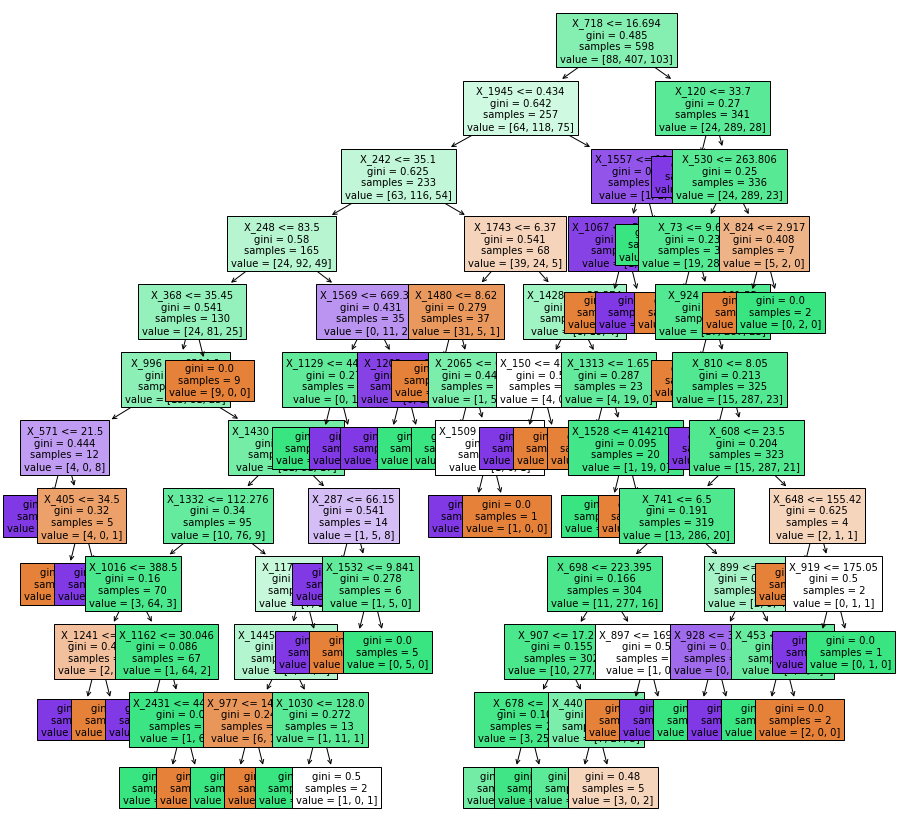

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [ ]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 50):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=37)
    train_y_predict = model.fit(train_x, train_y).predict(train_x)
    score = accuracy_score(train_y, train_y_predict) * 100
    print(max_depth, score)

3 75.4180602006689
4 80.2675585284281
5 84.78260869565217
6 88.2943143812709
7 89.79933110367892
8 90.96989966555184
9 93.1438127090301
10 95.15050167224081
11 96.15384615384616
12 97.82608695652173


In [ ]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 50):
    model = RandomForestClassifier(max_depth=max_depth, random_state=37)
    train_y_predict = model.fit(train_x, train_y).predict(train_x)
    score = accuracy_score(train_y, train_y_predict) * 100
    print(max_depth, score)

3 74.5819397993311
4 78.59531772575251
5 81.93979933110369
6 85.61872909698997
7 88.12709030100334
8 90.63545150501672
9 94.31438127090301
10 95.48494983277592
11 95.9866220735786
12 97.9933110367893


In [ ]:
RF = RandomForestClassifier(max_depth = 11, random_state=37).fit(train_x, train_y)
print('Done.')
# 0.449281971

Done.


In [ ]:
RF = DecisionTreeClassifier(max_depth = 11, random_state=37).fit(train_x, train_y)
print('Done.')
# 0.5155610156

Done.


#### GradientBoostingClassifier (Not yet)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

RF =  GradientBoostingClassifier(random_state=37).fit(train_x, train_y)
print('Done.')

Done.


#### RandomizedSearchCV (Not Yet)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=37),
RandomForestClassifier(random_state=37),
GradientBoostingClassifier(random_state=37)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(train_x, train_y)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "cv_result"])

In [ ]:
df

In [ ]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_train_score")

## Inference

In [ ]:
preds = RF.predict(test_x)
print('Done.')

Done.


## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = preds

In [ ]:
submit.to_csv('./submission7.csv', index=False)